<a href="https://colab.research.google.com/github/pranathi000/ML_libraries/blob/main/Linear_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

This is the first baby step to learn machine learning. The process of converting the raw data into clean data.

All of you are well aware of the point that machine learning engineers use data which are in the form of datasets.

In the following notebooks, I'll take/directly import the datasets from kaggle that has many datasets.

I will make every notebook larger in length since there are a bundle of concepts waiting for you.



As mentioned already, the preprocessing steps you will need for your dataset depend on the nature of the dataset and models you want to train. Possible preprocessing steps are:

* Rescaling attributes with different scales
* Standardizing the dataset
* Encoding categorial attributes with integer values
* Handling missing data
* Removing duplicated data points
* Removing outliers/ handle noisy data
* Discretize the data
* Split the dataset into a training and test set

I am pikcing up the Housing prices dataset Dataset which is available on kaggle [here ](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

When you go there and click the download button you'll get a piece of code which you can import to colab or jupyter notebook.

Below code piece refers to the dataset.

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


I hope you're here after bagging some knowledge on numpy, pandas, and matplotlib. If you want to refer Numpy, you can check my numpy basic notebooks [in my github](https://github.com/pranathi000/ML_libraries/tree/main/Numpy).





In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df is a dataframe here. in order to read csv files there read_csv in pandas is used.
### Why path + ......?
We are on the path of housing prices dataset. To access it you have to access Housing.csv. That's why we added .csv file to our previous path.
### What is a dataframe?
In machine learning, a DataFrame (df) is commonly used to store and manipulate training data where

df.head() is used to print first 5 rows of data present in the dataset

In [6]:

# Read the CSV file from the downloaded path
df = pd.read_csv(path + "/Housing.csv")  # Assuming the file is named Housing.csv

# Display first 5 rows
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  



df.describe():

Generates statistical summary of numerical columns
Shows count, mean, std, min, 25%, 50%, 75%, max
Helps identify data distribution and potential outliers

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Notable patterns:

Wide price range suggesting luxury market

Most homes have 2-3 bedrooms

Typically 1-2 bathrooms

Many homes lack parking


---



## Inspecting the Dataset
df.info():

Displays DataFrame information including:

Total rows and columns

Column names and data types

Memory usage

Non-null counts


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


The dataset has:

545 rows (houses)
13 columns with no missing values
6 numeric columns (price, area, bedrooms, bathrooms, stories, parking)
7 categorical columns (mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus)
Integer type for numeric columns
Object type for categorical columns
Uses ~55.5 KB memory

This suggests a clean dataset without null values, requiring categorical encoding for the object columns before modeling.


---



***df.hist(bins=100, figsize=(25, 20)):***

Creates histograms for all numerical columns

bins=100: Number of bars in histogram

figsize=(25, 20): Size of the plot in inches

Helps visualize data distribution for each feature

These methods are essential for initial data exploration and understanding your dataset's characteristics.

## Visualizing aspects of the dataset
Another way to get familiar with the dataset is to look at all numerical attributes and plot a histogram for each of them.



> What is a histogram?
A histogram is a graphical representation of data that uses bars of different heights. It groups data points into value ranges. The exact shape of the value ranges depends on the number of bars. With a lot of bars, value ranges will be small, with only a few bars they will be wider. The height of a bar (y-axis) represents the number of data points that fall into the corresponding value range (x-axis).





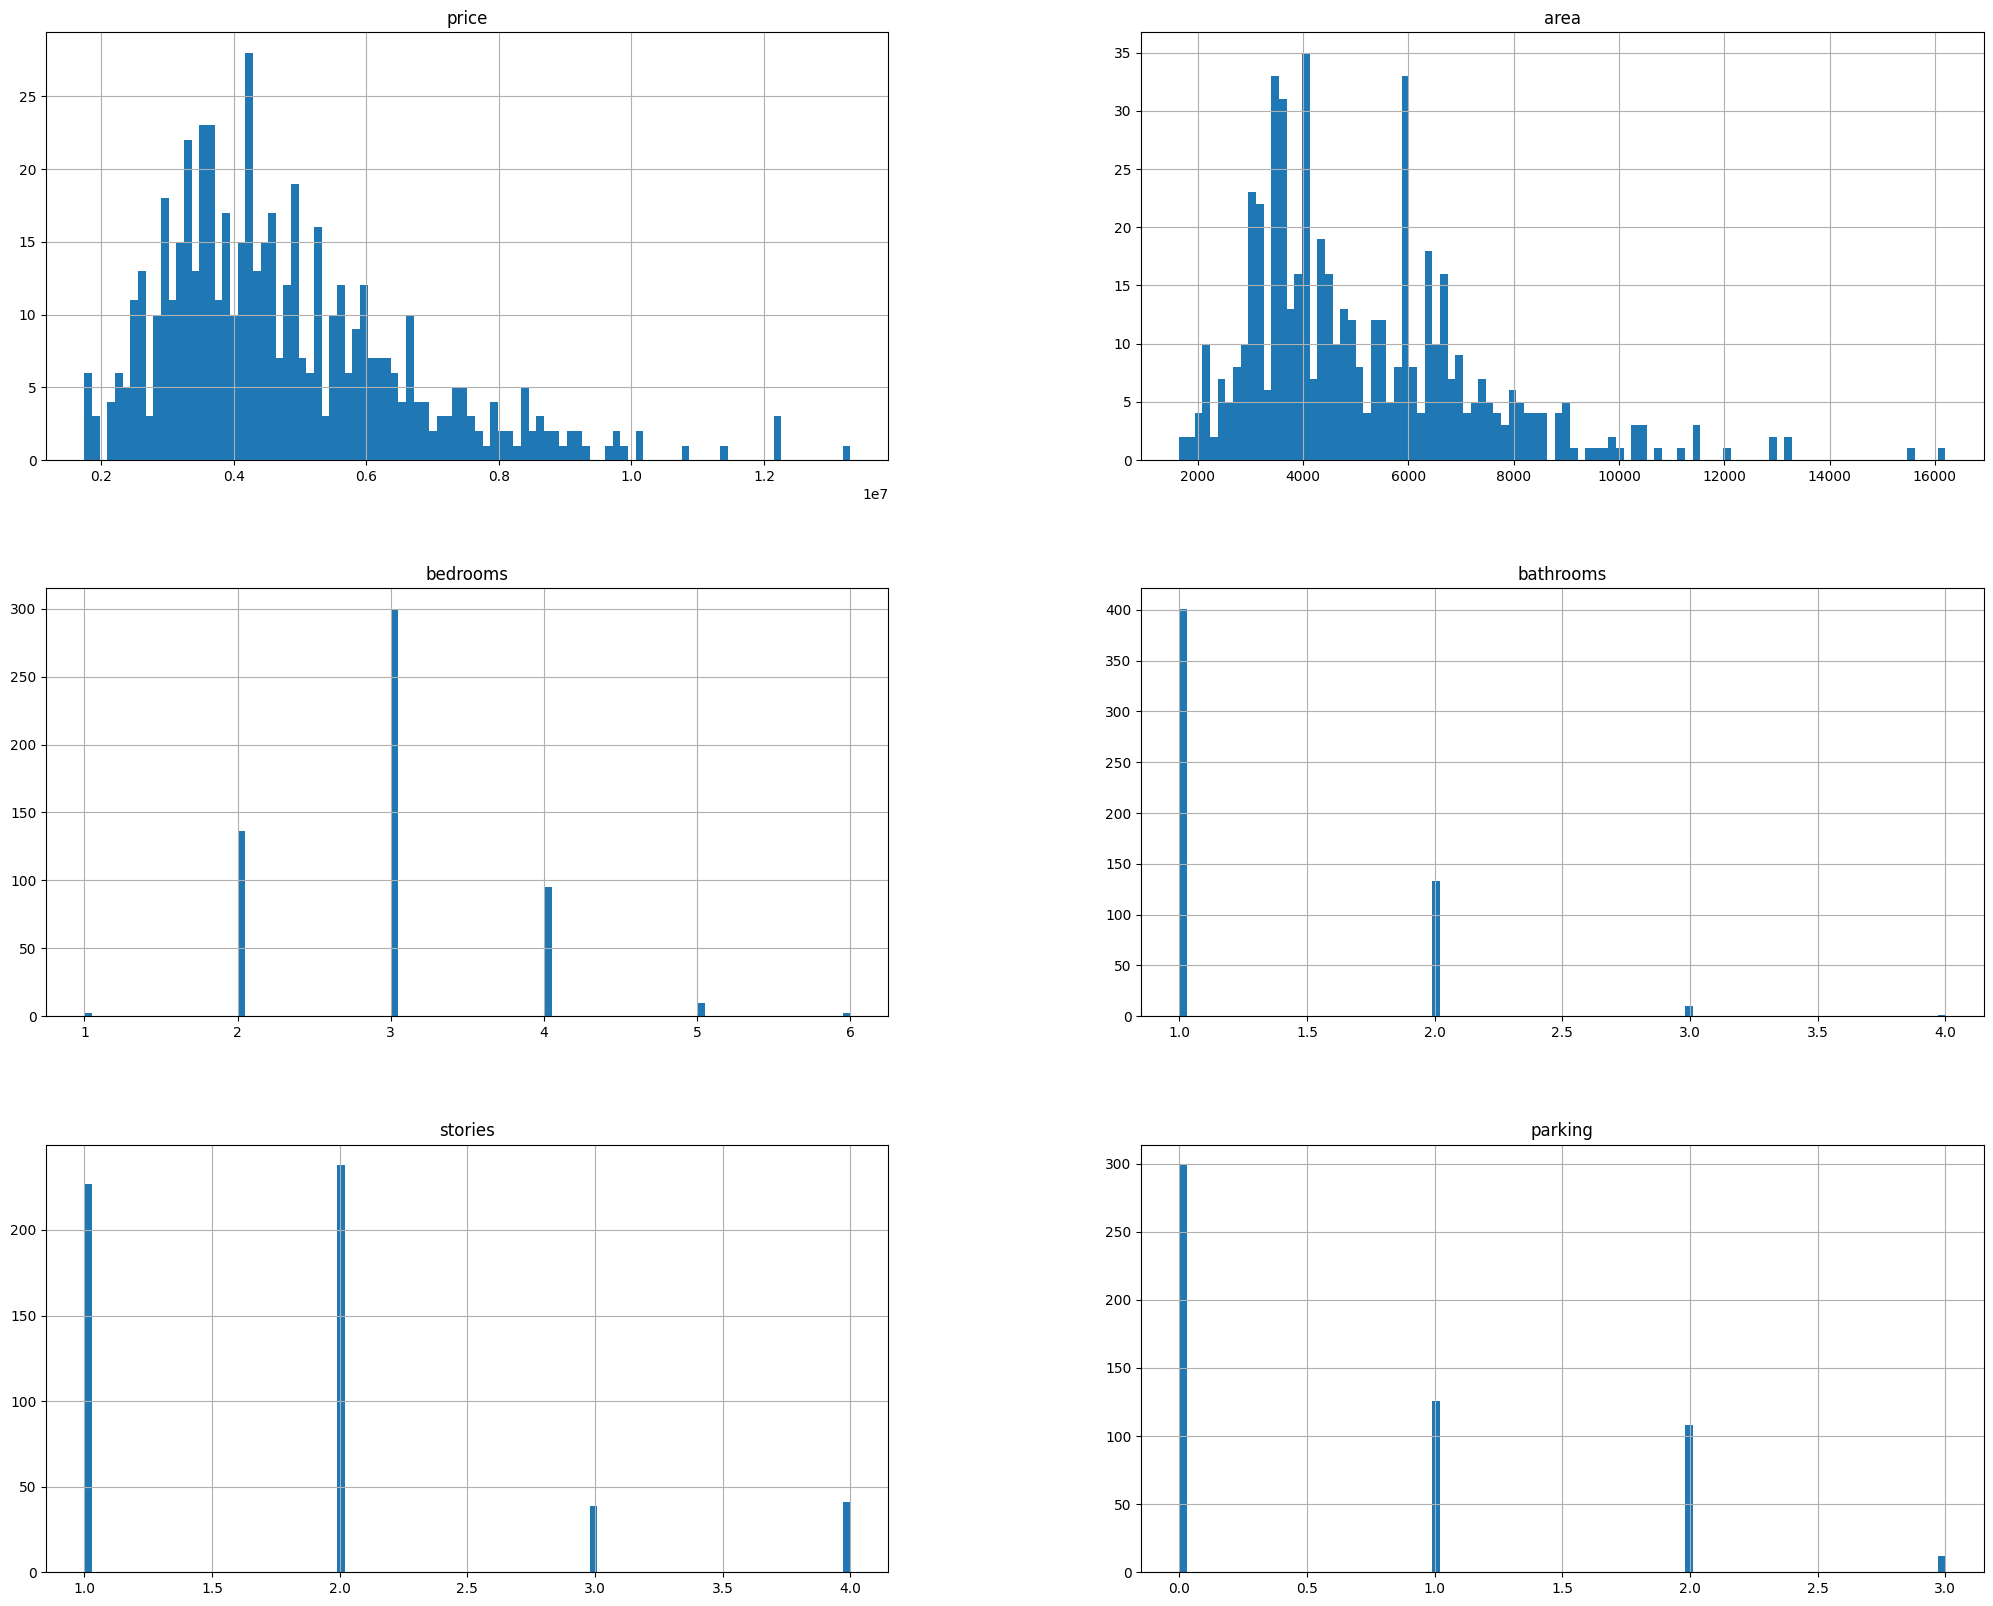

In [9]:
df.hist(bins=100, figsize=(25, 20))
plt.show()

Observe the histogrm carefully:
* price and area are right skewed as they are left centered

---


## Removing duplicated data points

To make sure that none of the data point are duplicated and hence overrepresented, we can scan the dataset for duplicated entries and delete them. This becomes very easy with the DataFrame.drop_duplicates() function.

In [10]:
df.drop_duplicates(keep='first', inplace=True)


## Take a deep look

We are just converting yes/no values into 0 or 1 since it's easy to handle the dataset with numbers rather than categorical ones.

we are using a .map function to map 1 for yes and 0 for no.

In [11]:
# These columns have only yes/no values
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                 'airconditioning', 'prefarea']

# Convert yes/no to 1/0
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

This converts furnishing categories (like unfurnished, semi-furnished, furnished) to numbers (0, 1, 2).

This encoding is necessary because machine learning models can't process text data directly.

In [12]:
df['furnishingstatus'] = pd.Categorical(df['furnishingstatus']).codes


## Gaining further insight
To further improve our understanding of the dataset, we can add a few more exploration steps. Besides creating more plots, another useful thing is looking for correlations between the attributes.

For example, we can compute Pearson's correlation coefficient. From the linked Wikipedia website:

> Pearson's correlation coefficient is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

A 'total positive linear correlation' means that as X increases, Y increases. A 'total negative linear correlation' means that as X increases, Y decreases.

> We can easily compute Pearson's correlation coefficient between every pair of attributes using DataFrame.corr(). In fact, DataFrame.corr() could also be used to compute the Kendall Tau correlation coefficient or Spearman rank correlation.

In [13]:
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)


                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

In [14]:
print(correlation_matrix["price"].sort_values())


furnishingstatus   -0.304721
hotwaterheating     0.093073
basement            0.187057
guestroom           0.255517
mainroad            0.296898
prefarea            0.329777
bedrooms            0.366494
parking             0.384394
stories             0.420712
airconditioning     0.452954
bathrooms           0.517545
area                0.535997
price               1.000000
Name: price, dtype: float64


The highest correlation exists for the attribute "area" and "bathrooms". However, it's important that we keep in mind that Pearson's only measures linear correlations. Nonlinear correlations are not measured and might still exist!

---



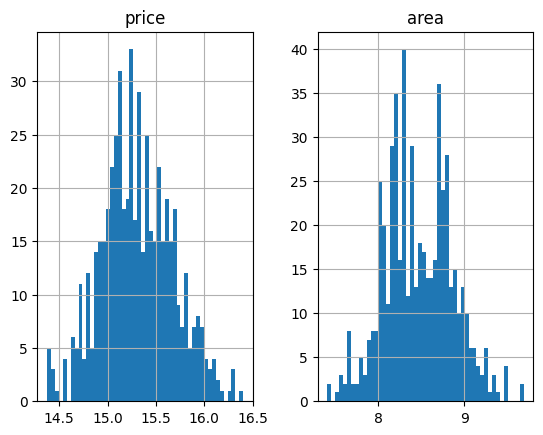

In [15]:
# Log transform price and area
df['price'] = np.log(df['price'])
df['area'] = np.log(df['area'])

# Check transformed distributions
df[['price', 'area']].hist(bins=50)
plt.show()

The log transformation is used because:

1. It reduces skewness in price and area distributions
2. Makes extreme values less influential
3. Helps normalize the data for better model performance
4. Converts multiplicative relationships to additive ones

The histogram after transformation should show more symmetric, bell-shaped distributions compared to the original right-skewed data.

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Missing values after filling:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


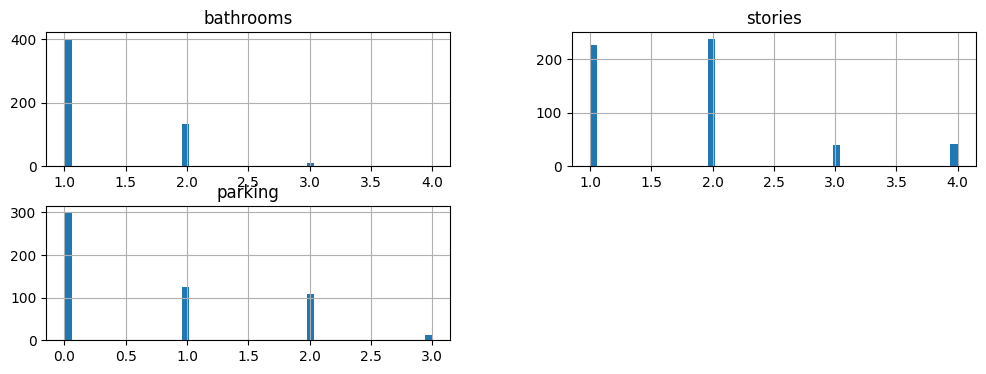

In [16]:
# Check missing values
print(df.isnull().sum())

# Fill missing values using recommended method
df = df.fillna({
    'bathrooms': df['bathrooms'].median(),
    'stories': df['stories'].median(),
    'parking': df['parking'].median()
})

# Verify after filling
print("\nMissing values after filling:")
print(df.isnull().sum())

# Plot distributions
df[['bathrooms', 'stories', 'parking']].hist(bins=50, figsize=(12,4))
plt.show()

From the output:

There are no missing values in the dataset (all columns show 0)


np.random.seed(42):


* Sets random number generator for reproducibility
* 42 is arbitrary, any number works but we mostly use 42.
* Ensures same random splits each time code runs


Splitting data:


* Essential for model evaluation
* Train set (80%): Model learning
* Test set (20%): Unbiased performance evaluation
---
In our dataset, we have both features (input variables) and prices (output/target variable). For prediction:

* Features (X): Remove price column since it's what we want to predict
* Target (y): Contains only price column to train the model and evaluate its predictions

* The model learns how input features (X) relate to actual prices (y) during training, then uses those features to predict new house prices.

---
---
## Handling noisy data and outliers
> It might happen that some entries of our dataset are noisy or that the dataset contains outliers. For example, the blood pressure of some person might be extremely high if they suffer from hypertension. Outliers might also represent erroneous values. For example, the age attribute should lie below 120.

> Outliers can be detected in different ways. For the age attribute we could simply check the statistics given by df.describe() and check if the min and max values are reasonable. The same holds for other attributes. If you know in which range the attribute values should lie, you can quickly test if the dataset values are within that range.

 Once you detect outliers you can decide how you want to deal with them. For example, you could remove them.

 ---
 ---

In [17]:
# Split data
from sklearn.model_selection import train_test_split # Importing the train_test_split function from the sklearn.model_selection module
X = df.drop('price', axis=1)
y = df['price']
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## One hot encoding
get_dummies creates separate columns for each category:

This is called one-hot encoding - each category gets its own column with 0/1 values. Better for machine learning than simple numeric encoding.

House1: 'furnished'

House2: 'unfurnished'

House3: 'semi-furnished'

After get_dummies:

pythonCopy# Creates 3 separate columns

>   furnishingstatus_furnished: [1, 0, 0]

> furnishingstatus_unfurnished: [0, 1, 0]

> furnishingstatus_semifurnished: [0, 0, 1]

Each house has exactly one '1' and rest '0's

Models can understand category differences better


In [18]:
# Preprocess categorical features
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea']
X_train = pd.get_dummies(X_train, columns=binary_cols + ['furnishingstatus'])
X_test = pd.get_dummies(X_test, columns=binary_cols + ['furnishingstatus'])

## Standardizing attributes
Several algorithms are sensitive to the scale of numerical attributes and won't perform well if the attributes have very different scales.

* A classical example is the k-nearest-neighbor algorithm. When having an attribute "age" that ranges from 0 to 100 and an attribute "income" that ranges from 1 to 1.000.000, the attribute with the larger range will have a higher influence on the result.

* Therefore, whenever having attributes with different scales, make sure to rescale them. Two standard ways of rescaling are min-max scaling and standardization.
---

StandardScaler:

1. Centers data around 0 (subtracts mean)

2. Scales to unit variance (divides by std)

3. Only fit on training data to prevent data leakage

4. Same scaling applied to test data

Purpose: Makes features comparable in scale for better model performance.




In [19]:
# Create scaler object
from sklearn.preprocessing import StandardScaler # Import StandardScaler from sklearn.preprocessing
scaler = StandardScaler()

# List numeric columns to scale
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Fit and transform training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform test data using same scaling
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [20]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)


1. Why transform prices?
- House prices often have very large ranges (e.g., $100k to $10M)
- This wide range can make it hard for models to predict accurately

2. Why log1p?
```python
y_train = np.log1p(y_train)  # log(1 + x)
y_test = np.log1p(y_test)
```
- Compresses large values
- Makes price distribution more normal
- log1p adds 1 before taking log (handles zero values)
- Makes model predictions more stable

Example:
Original prices: [100000, 1000000, 10000000]
After log1p: [11.51, 13.82, 16.12]
- Smaller range, easier for model to handle

In [21]:
# Calculate absolute correlation with price
corr_with_price = abs(X_train.corrwith(y_train))

# Select features with correlation > 0.1
selected_features = corr_with_price[corr_with_price > 0.1].index

# Keep only selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

This code selects important features based on their correlation with price:

Purpose:
- Removes less relevant features
- Keeps features strongly correlated with price
- Reduces model complexity
- Can improve model performance by focusing on important predictors

In [22]:
import scipy.stats as stats  # Import the stats module from scipy

# Check final number of features after selection
print("Final X shape:", X_train.shape)  # Shows (rows, selected_features)

# Check if price distribution is normal after log transform
print("Skewness of price:", stats.skew(y_train))  # Closer to 0 means more normal

Final X shape: (436, 18)
Skewness of price: 0.1163020532075822


The skewness value of 0.11....... is good because:
- Perfect normal distribution has skewness = 0
- |skewness| < 0.5 is considered approximately normal
- |skewness| > 1 indicates significant skewness

Your 0.11 value means the price distribution is nearly normal after transformation, which is ideal for modeling.

Shape (436, 18) means:
- 436 training samples
- 18 features selected (correlation > 0.1)
This is a reasonable size for housing price prediction.

In [23]:
m = X_train.shape[0]  # Gets number of rows (training examples)
print(f"Number of training examples is: {m}")  # Prints count of training data

Number of training examples is: 436



Shape (436, 18) means:
- m = 436 training examples
- 18 features per example

This helps verify data splitting worked correctly and you have sufficient training data.